# **ARBOL, BOSQUE ALEATORIO, SVM, KNN, REGRESION LOGÍSTICA**
Edgar Espejo Mora

# **DESCRIPCIÓN DE LOS DATOS A USAR**

Se trata de 12000 curvas x-y o espectros obtenidos a partir de imágenes de superficies de fractura, las cuales pertenecen a tres categorías posibles: Fractura dúctil, fractura frágil y fractura por fatiga. El eje "y" representa el nivel de intensidad o brillo (de 0 a 1) para cada punto x. En total se tienen 200 puntos para el eje x de cada curva.

## **1. Entendimiento del Negocio o Aplicación**



### **1.1. Objetivo de la Aplicación**

Se busca verificar si existe diferencia significativa entre las curvas para las tres categorías posibles, con lo cual se puede desarrollar un clasificador que pronostique a partir del suministro de la curva, el tipo de fractura a la
 cual pertenece, usando técnicas de clasificación supervisada.

### **1.2. Situación Actual**

Las 12000 curvas disponibles fueron suministradas por un profesional en el área de fractura de elementos mecánicos, que proporcionó el conocimiento experto para poder categorizar cada una de ellas y poder evaluar así algoritmos de clasificación supervisada.

### **1.3. Metas**



> Evaluar el desempeño de varios algoritmos de clasificación supervisada, para lo cual previamente se han dividido las 12000 curvas en 70% para entrenamiento y 30% para ensayo.


> A partir de la evaluación anterior, proponer el algotitmo más conveniente para aplicarse en esta tarea.





### **1.4. Planeación**

El análisis de los datos se hará en las siguientes fases:



> Etiquetado de los datos: Cada una de las curvas disponibles ya fue categorizada con tres números por el experto en fracturas, en los tres niveles a saber: 1. fractura dúctil, 2. fractura frágil y 3. fractura por fatiga.


> Separación en los grupos de entrenamiento y prueba: El experto ya separó los datos en 70% para entrenamiento y 30% para prueba, manteniendo en cada grupo la misma proporción de casos de los tres tipos de curvas.


> Planteamiento de los modelos: Se compará el desempeño de los modelos de clasificación 1. Arbol de decisión, 2. Random Forest, 3. SVM, 4. Regresión logística, 5. KNN y 6. Red Neuronal, variando algunos de sus hiperparámetros. Usándose medidas de exactitud, presición, recall, F1 y tiempo de cálculo. Durante la etapa de entrenamiento de los modelos se usarán 3 pliegues.


> Conclusiones: A partir de los resultados anteriores se sacarán unas conclusiones, sobre los mejores clasificadores para los datos usados.















## **2. Entendimiento de los datos**

A continuación se procede a cargar las librerías necesarias, los datos y gráficas que permiten entenderlos.

In [5]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
# Configuraciones para las librerías y módulos usados

# Ignoramos las advertencias o warnings.
import warnings
warnings.simplefilter(action='ignore')

# Configuramos el formato por defecto de la
# librería de visualización Matplotlib.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
# Versión de Python y las demás librerías.
!python --version
print('Scikit-learn', sklearn.__version__)
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

Python 3.10.12
Scikit-learn 1.2.2
NumPy 1.23.5
Pandas 1.5.3
Matplotlib 3.7.1
Seaborn 0.12.2


In [8]:
# Carga del DataFrame.
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_train.csv') # genera data frame de pandas
X_train = X_train.values # genera objeto de numpy
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_test.csv')
X_test = X_test.values
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_train.csv')
y_train = y_train.values
y_train = y_train.reshape(8400,)
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_test.csv')
y_test = y_test.values
y_test = y_test.reshape(3600,)

In [9]:
X_train.shape

(8400, 200)

In [10]:
X_test.shape

(3600, 200)

In [11]:
y_train.shape

(8400,)

In [12]:
y_test.shape

(3600,)

A continuación se muestran como ejemplo una curva de cada una de las categorías, donde se puede ver que por pura inspección visual es dificil distinguir las diferencias debido al importante nivel de traslape.

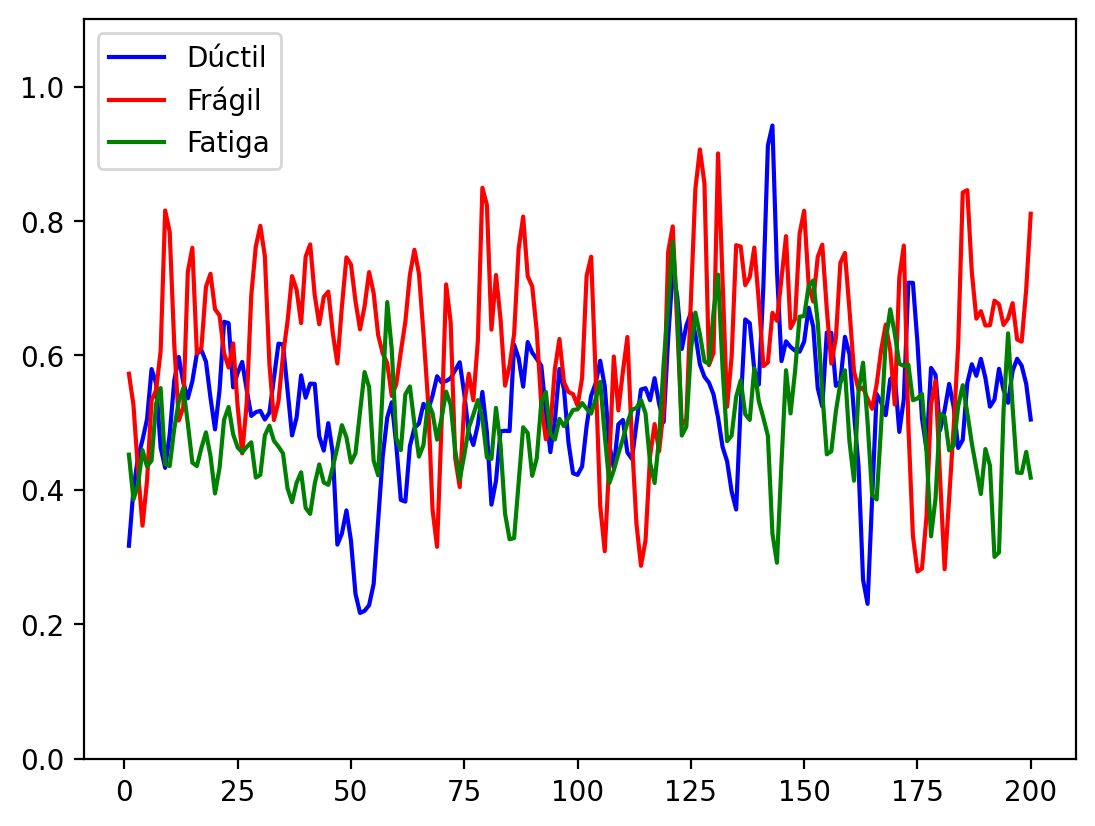

In [ ]:
import pylab as pl

x = np.arange(1,201,1)
y1 = X_train[1400,]
y2 = X_train[4200,]
y3 = X_train[7000,]
pl.ylim(0,1.1)
pl.plot(x,y1, color="blue", label="Dúctil")
pl.plot(x,y2, color="red", label="Frágil")
pl.plot(x,y3, color="green", label="Fatiga")

pl.legend(loc="upper left")


## **3. Clasificación con Arbol de Decisión**

A continuación se procede a entrenar el modelo y encontrar hiperparámetros óptimos.


In [ ]:
# Función para entregar gsearch del Arbol de Decisión.
from sklearn import model_selection
from sklearn import tree

def tree_grid_search(X_train, y_train, param_grid, k, seed = 333):
  """
  Entradas:
    X_train: Arreglo de NumPy con shape (n, m),
    y_train: Arreglo de NumPy con shape (n,).
    param_grid: Hiperparámetros a explorar.
    k: Número de pliegues de validación cruzada
    seed: semilla aleatoria para la creación de la partición.
  Retorna:
    gsearch: GridSearchCV entrenado con X_train y y_train.
  """

  from sklearn.tree import DecisionTreeClassifier
  tree_clf = DecisionTreeClassifier(random_state=seed)

  # Declarar y entrenar el objeto GridSearchCV.
  from sklearn.model_selection import GridSearchCV
  gsearch = GridSearchCV(tree_clf,
                   cv=k,
                   param_grid=param_grid,
                   return_train_score=True
                    )
  gsearch.fit(X_train, y_train)

  return gsearch

In [ ]:
# Mejores Hiperparámetros Obtenidos del árbol de decisión
# Corre en 2 min en colab
param_grid = {
    "max_depth": range(5, 60, 5),     # Profundidad máxima del árbol de decisión.
    "criterion": ["gini", "entropy"], # Criterio de partición del árbol de decisión.
  }
gsearch = tree_grid_search(X_train, y_train, param_grid, k=3)
print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'criterion': 'gini', 'max_depth': 25}
Mejor exactitud (validación): 0.578690


In [ ]:
# Función de Métricas de Desempeño para el Arbol de Decisión

from sklearn import metrics
from scipy.stats.contingency import crosstab

def tree_performance_metrics(gsearch, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  y_pred = gsearch.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_macro = precision_score(y_test, y_pred, average="macro")
  recall_macro = recall_score(y_test, y_pred, average="macro")
  f1_macro = f1_score(y_test, y_pred, average="macro")
  options = [1, 2, 3]
  ctable = crosstab(y_test, y_pred, levels=(options, options))
  ctableductil1 = crosstab(y_test[0:400,], y_pred[0:400,], levels=(options, options))
  ctableductil2 = crosstab(y_test[400:800,], y_pred[400:800,], levels=(options, options))
  ctableductil3 = crosstab(y_test[800:1200,], y_pred[800:1200,], levels=(options, options))
  ctablefragil1 = crosstab(y_test[1200:1600,], y_pred[1200:1600,], levels=(options, options))
  ctablefragil2 = crosstab(y_test[1600:2000,], y_pred[1600:2000,], levels=(options, options))
  ctablefragil3 = crosstab(y_test[2000:2400,], y_pred[2000:2400,], levels=(options, options))
  ctablefatiga1 = crosstab(y_test[2400:2800,], y_pred[2400:2800,], levels=(options, options))
  ctablefatiga2 = crosstab(y_test[2800:3200,], y_pred[2800:3200,], levels=(options, options))
  ctablefatiga3 = crosstab(y_test[3200:3600,], y_pred[3200:3600,], levels=(options, options))

  return accuracy, precision_macro, recall_macro, f1_macro, ctable.count, ctableductil1.count, ctableductil2.count, ctableductil3.count, ctablefragil1.count, ctablefragil2.count, ctablefragil3.count, ctablefatiga1.count, ctablefatiga2.count, ctablefatiga3.count

In [ ]:
# Métrica de desempeño del Arbol de Decisión 1

acc, prec, rec, f1, ctable, ctableductil1, ctableductil2, ctableductil3, ctablefragil1, ctablefragil2, ctablefragil3, ctablefatiga1, ctablefatiga2, ctablefatiga3 = tree_performance_metrics(gsearch, X_test, y_test)
print(f'Exactitud en prueba: {acc:.6f}')
print(f'Precisión macro en prueba: {prec:.6f}')
print(f'Recall macro en prueba: {rec:.6f}')
print(f'F1 macro en prueba: {f1:.6f}')

Exactitud en prueba: 0.626944
Precisión macro en prueba: 0.631875
Recall macro en prueba: 0.626944
F1 macro en prueba: 0.627047


In [ ]:
# Métrica de desempeño del Arbol de Decisión 2

print("General por curvas")
print(ctable)
print((ctable[0,0]+ctable[1,1]+ctable[2,2])/3600)
print(ctable[0,0]/1200)
print(ctable[1,1]/1200)
print(ctable[2,2]/1200)




General por curvas
[[699 153 348]
 [204 744 252]
 [166 220 814]]
0.6269444444444444
0.5825
0.62
0.6783333333333333


In [ ]:
# Métrica de desempeño del Arbol de Decisión 3
print("Por fotos dúctiles")
print(ctableductil1)
print(ctableductil2)
print(ctableductil3)

Por fotos dúctiles
[[303  23  74]
 [  0   0   0]
 [  0   0   0]]
[[208  55 137]
 [  0   0   0]
 [  0   0   0]]
[[188  75 137]
 [  0   0   0]
 [  0   0   0]]


In [ ]:
print("Por fotos frágiles")
print(ctablefragil1)
print(ctablefragil2)
print(ctablefragil3)

Por fotos frágiles
[[  0   0   0]
 [ 81 231  88]
 [  0   0   0]]
[[  0   0   0]
 [ 41 296  63]
 [  0   0   0]]
[[  0   0   0]
 [ 82 217 101]
 [  0   0   0]]


In [ ]:
print("Por fotos fatiga")
print(ctablefatiga1)
print(ctablefatiga2)
print(ctablefatiga3)

Por fotos fatiga
[[  0   0   0]
 [  0   0   0]
 [ 52  53 295]]
[[  0   0   0]
 [  0   0   0]
 [ 92  95 213]]
[[  0   0   0]
 [  0   0   0]
 [ 22  72 306]]


## **4. Clasificación con Random Forest**

A continuación se procede a entrenar el modelo y encontrar hiperparámetros óptimos.

In [ ]:
# Función para entregar gsearch del Random Forest.
from sklearn import model_selection

def RandomForest_grid_search(X_train, y_train, param_grid, k, seed = 333):
  """
  Entradas:
    X_train: Arreglo de NumPy con shape (n, m),
    y_train: Arreglo de NumPy con shape (n,).
    param_grid: Hiperparámetros a explorar.
    k: Número de pliegues de validación cruzada
    seed: semilla aleatoria para la creación de la partición.
  Retorna:
    gsearch: GridSearchCV entrenado con X_train y y_train.
  """

  from sklearn.ensemble import RandomForestClassifier
  RandomForest_clf = RandomForestClassifier(random_state=seed)

  # Declarar y entrenar el objeto GridSearchCV.
  from sklearn.model_selection import GridSearchCV
  gsearch = GridSearchCV(RandomForest_clf,
                   cv=k,
                   param_grid=param_grid,
                   return_train_score=True
                    )
  gsearch.fit(X_train, y_train)

  return gsearch

In [ ]:
# Mejores Hiperparámetros Obtenidos del Random Forest
# Primero se corrio max features [0.1, 0.3, 0.5, 0.7, 0.9] con 50 arboles y arrojo mejor 0.1, 10 min corriendo en colab
# Se corrio max features [0.04, 0.06, 0.08, 0.1, 1.2] con 50 arboles y arrojo mejor 0.04, 1 min corriendo en colab
# Se corrio max features [[0.01, 0.02, 0.03, 0.04, 0.05] con 50 arboles y arrojo mejor 0.04, 45 seg corriendo en colab
# n estimators [25, 50, 100] con 0.04 max features y arrojo mejor 100, 45 seg corriendo en colab
# n estimators [50, 100, 150] con 0.04 max features y arrojo mejor 150, 1 min corriendo en colab
# n estimators [100, 150, 200, 250] con 0.04 max features y arrojo mejor 200, 2 min corriendo en colab
# Corre en 6 m in en colab

param_grid = {
    "n_estimators": [150, 200, 250],     # Número de árboles del Random Forest.
    "max_features": [0.02, 0.04, 0.06],    # Porcentaje de características del Random Forest.
  }
gsearch = RandomForest_grid_search(X_train, y_train, param_grid, k=3)
print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'max_features': 0.04, 'n_estimators': 200}
Mejor exactitud (validación): 0.763452


In [ ]:
# Función de Métricas de Desempeño para Random Forest

from sklearn import metrics
from scipy.stats.contingency import crosstab

def RandomForest_performance_metrics(gsearch, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  y_pred = gsearch.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_macro = precision_score(y_test, y_pred, average="macro")
  recall_macro = recall_score(y_test, y_pred, average="macro")
  f1_macro = f1_score(y_test, y_pred, average="macro")
  options = [1, 2, 3]
  ctable = crosstab(y_test, y_pred, levels=(options, options))
  ctableductil1 = crosstab(y_test[0:400,], y_pred[0:400,], levels=(options, options))
  ctableductil2 = crosstab(y_test[400:800,], y_pred[400:800,], levels=(options, options))
  ctableductil3 = crosstab(y_test[800:1200,], y_pred[800:1200,], levels=(options, options))
  ctablefragil1 = crosstab(y_test[1200:1600,], y_pred[1200:1600,], levels=(options, options))
  ctablefragil2 = crosstab(y_test[1600:2000,], y_pred[1600:2000,], levels=(options, options))
  ctablefragil3 = crosstab(y_test[2000:2400,], y_pred[2000:2400,], levels=(options, options))
  ctablefatiga1 = crosstab(y_test[2400:2800,], y_pred[2400:2800,], levels=(options, options))
  ctablefatiga2 = crosstab(y_test[2800:3200,], y_pred[2800:3200,], levels=(options, options))
  ctablefatiga3 = crosstab(y_test[3200:3600,], y_pred[3200:3600,], levels=(options, options))

  return accuracy, precision_macro, recall_macro, f1_macro, ctable.count, ctableductil1.count, ctableductil2.count, ctableductil3.count, ctablefragil1.count, ctablefragil2.count, ctablefragil3.count, ctablefatiga1.count, ctablefatiga2.count, ctablefatiga3.count

In [ ]:
# Métrica de desempeño para Random Forest 1

acc, prec, rec, f1, ctable, ctableductil1, ctableductil2, ctableductil3, ctablefragil1, ctablefragil2, ctablefragil3, ctablefatiga1, ctablefatiga2, ctablefatiga3 = RandomForest_performance_metrics(gsearch, X_test, y_test)
print(f'Exactitud en prueba: {acc:.6f}')
print(f'Precisión macro en prueba: {prec:.6f}')
print(f'Recall macro en prueba: {rec:.6f}')
print(f'F1 macro en prueba: {f1:.6f}')

Exactitud en prueba: 0.885833
Precisión macro en prueba: 0.888632
Recall macro en prueba: 0.885833
F1 macro en prueba: 0.884942


In [ ]:
# Métrica de desempeño del Random Forest 2

print("General por curvas")
print(ctable)
print((ctable[0,0]+ctable[1,1]+ctable[2,2])/3600)
print(ctable[0,0]/1200)
print(ctable[1,1]/1200)
print(ctable[2,2]/1200)




General por curvas
[[ 953   41  206]
 [  12 1165   23]
 [  68   61 1071]]
0.8858333333333334
0.7941666666666667
0.9708333333333333
0.8925


In [ ]:
# Métrica de desempeño del Random Forest 3
print("Por fotos dúctiles")
print(ctableductil1)
print(ctableductil2)
print(ctableductil3)

Por fotos dúctiles
[[395   1   4]
 [  0   0   0]
 [  0   0   0]]
[[284   2 114]
 [  0   0   0]
 [  0   0   0]]
[[274  38  88]
 [  0   0   0]
 [  0   0   0]]


In [ ]:
print("Por fotos frágiles")
print(ctablefragil1)
print(ctablefragil2)
print(ctablefragil3)

Por fotos frágiles
[[  0   0   0]
 [  5 395   0]
 [  0   0   0]]
[[  0   0   0]
 [  0 400   0]
 [  0   0   0]]
[[  0   0   0]
 [  7 370  23]
 [  0   0   0]]


In [ ]:
print("Por fotos fatiga")
print(ctablefatiga1)
print(ctablefatiga2)
print(ctablefatiga3)

Por fotos fatiga
[[  0   0   0]
 [  0   0   0]
 [ 15  16 369]]
[[  0   0   0]
 [  0   0   0]
 [ 52  32 316]]
[[  0   0   0]
 [  0   0   0]
 [  1  13 386]]


## **5. Clasificación con SVM y Kernel Gaussiano**

A continuación se procede a entrenar el modelo y encontrar hiperparámetros óptimos.

In [ ]:
# Función para entregar gsearch de SVM.
from sklearn import model_selection

def SVM_grid_search(X_train, y_train, param_grid, k, seed = 333):
  """
  Entradas:
    X_train: Arreglo de NumPy con shape (n, m),
    y_train: Arreglo de NumPy con shape (n,).
    param_grid: Hiperparámetros a explorar.
    k: Número de pliegues de validación cruzada
    seed: semilla aleatoria para la creación de la partición.
  Retorna:
    gsearch: GridSearchCV entrenado con X_train y y_train.
  """

  from sklearn.svm import SVC
  SVM_clf = SVC(kernel='rbf', random_state=seed)

  # Declarar y entrenar el objeto GridSearchCV.
  from sklearn.model_selection import GridSearchCV
  gsearch = GridSearchCV(SVM_clf,
                   cv=k,
                   param_grid=param_grid,
                   return_train_score=True
                    )
  gsearch.fit(X_train, y_train)

  return gsearch

In [ ]:
# Mejores Hiperparámetros Obtenidos del SVM Gaussiano
# Se corrio "C": [2**i for i in range(-1, 0, 5)] y "gamma": [2**i for i in range(-5, 7, 5)], dio mejo i = -1 para C y para gamma corre en 9 min en colab
# Se corrio "C": [2**i for i in range(-5, 0, 1)] y "gamma": [0.5)], dio mejor i = -4 para C corre en 3 min en colab
# Parametros óptimos C 0.0625 y gamma 0.5 corre en 2 min

param_grid = {
    "C": [2**i for i in range(-5, -3, 1)],     # Parámetro de Regularización.
    "gamma": [2**i for i in range(-2, 0, 1)], # Coeficiente del Kernel.
  }
gsearch = SVM_grid_search(X_train, y_train, param_grid, k=3)
print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'C': 0.0625, 'gamma': 0.5}
Mejor exactitud (validación): 0.782857


In [ ]:
# Función de Métricas de Desempeño del SVM Gaussiano

from sklearn import metrics
from scipy.stats.contingency import crosstab

def SVM_performance_metrics(gsearch, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  y_pred = gsearch.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_macro = precision_score(y_test, y_pred, average="macro")
  recall_macro = recall_score(y_test, y_pred, average="macro")
  f1_macro = f1_score(y_test, y_pred, average="macro")
  options = [1, 2, 3]
  ctable = crosstab(y_test, y_pred, levels=(options, options))
  ctableductil1 = crosstab(y_test[0:400,], y_pred[0:400,], levels=(options, options))
  ctableductil2 = crosstab(y_test[400:800,], y_pred[400:800,], levels=(options, options))
  ctableductil3 = crosstab(y_test[800:1200,], y_pred[800:1200,], levels=(options, options))
  ctablefragil1 = crosstab(y_test[1200:1600,], y_pred[1200:1600,], levels=(options, options))
  ctablefragil2 = crosstab(y_test[1600:2000,], y_pred[1600:2000,], levels=(options, options))
  ctablefragil3 = crosstab(y_test[2000:2400,], y_pred[2000:2400,], levels=(options, options))
  ctablefatiga1 = crosstab(y_test[2400:2800,], y_pred[2400:2800,], levels=(options, options))
  ctablefatiga2 = crosstab(y_test[2800:3200,], y_pred[2800:3200,], levels=(options, options))
  ctablefatiga3 = crosstab(y_test[3200:3600,], y_pred[3200:3600,], levels=(options, options))

  return accuracy, precision_macro, recall_macro, f1_macro, ctable.count, ctableductil1.count, ctableductil2.count, ctableductil3.count, ctablefragil1.count, ctablefragil2.count, ctablefragil3.count, ctablefatiga1.count, ctablefatiga2.count, ctablefatiga3.count

In [ ]:
# Métrica de desempeño del SVM Gaussiano 1

acc, prec, rec, f1, ctable, ctableductil1, ctableductil2, ctableductil3, ctablefragil1, ctablefragil2, ctablefragil3, ctablefatiga1, ctablefatiga2, ctablefatiga3 = SVM_performance_metrics(gsearch, X_test, y_test)
print(f'Exactitud en prueba: {acc:.6f}')
print(f'Precisión macro en prueba: {prec:.6f}')
print(f'Recall macro en prueba: {rec:.6f}')
print(f'F1 macro en prueba: {f1:.6f}')

Exactitud en prueba: 0.868611
Precisión macro en prueba: 0.881502
Recall macro en prueba: 0.868611
F1 macro en prueba: 0.863208


In [ ]:
# Métrica de desempeño del SVM Gaussiano 2

print("General por curvas")
print(ctable)
print((ctable[0,0]+ctable[1,1]+ctable[2,2])/3600)
print(ctable[0,0]/1200)
print(ctable[1,1]/1200)
print(ctable[2,2]/1200)




General por curvas
[[ 800  143  257]
 [   5 1164   31]
 [  32    5 1163]]
0.8686111111111111
0.6666666666666666
0.97
0.9691666666666666


In [ ]:
# Métrica de desempeño del SVM Gaussiano 3
print("Por fotos dúctiles")
print(ctableductil1)
print(ctableductil2)
print(ctableductil3)

Por fotos dúctiles
[[269 119  12]
 [  0   0   0]
 [  0   0   0]]
[[232   7 161]
 [  0   0   0]
 [  0   0   0]]
[[299  17  84]
 [  0   0   0]
 [  0   0   0]]


In [ ]:
print("Por fotos frágiles")
print(ctablefragil1)
print(ctablefragil2)
print(ctablefragil3)

Por fotos frágiles
[[  0   0   0]
 [  1 399   0]
 [  0   0   0]]
[[  0   0   0]
 [  0 400   0]
 [  0   0   0]]
[[  0   0   0]
 [  4 365  31]
 [  0   0   0]]


In [ ]:
print("Por fotos fatiga")
print(ctablefatiga1)
print(ctablefatiga2)
print(ctablefatiga3)

Por fotos fatiga
[[  0   0   0]
 [  0   0   0]
 [ 14   1 385]]
[[  0   0   0]
 [  0   0   0]
 [ 18   4 378]]
[[  0   0   0]
 [  0   0   0]
 [  0   0 400]]


## **6. Clasificación con SVM y Kernel Poly**

A continuación se procede a entrenar el modelo y encontrar hiperparámetros óptimos.

In [ ]:
# Función para entregar gsearch de SVM.
from sklearn import model_selection

def SVM_grid_search(X_train, y_train, param_grid, k, seed = 333):
  """
  Entradas:
    X_train: Arreglo de NumPy con shape (n, m),
    y_train: Arreglo de NumPy con shape (n,).
    param_grid: Hiperparámetros a explorar.
    k: Número de pliegues de validación cruzada
    seed: semilla aleatoria para la creación de la partición.
  Retorna:
    gsearch: GridSearchCV entrenado con X_train y y_train.
  """

  from sklearn.svm import SVC
  SVM_clf = SVC(kernel='poly', random_state=seed)

  # Declarar y entrenar el objeto GridSearchCV.
  from sklearn.model_selection import GridSearchCV
  gsearch = GridSearchCV(SVM_clf,
                   cv=k,
                   param_grid=param_grid,
                   return_train_score=True
                    )
  gsearch.fit(X_train, y_train)

  return gsearch

In [ ]:
# Mejores Hiperparámetros Obtenidos del SVM Poly
param_grid = {
    "C": [2**i for i in range(-5, -3, 1)],     # Parámetro de Regularización.
    "gamma": [2**i for i in range(-2, 0, 1)], # Coeficiente del Kernel.
  }
gsearch = SVM_grid_search(X_train, y_train, param_grid, k=3)
print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'C': 0.0625, 'gamma': 0.5}
Mejor exactitud (validación): 0.732976


In [ ]:
# Función de Métricas de Desempeño del SVM Poly

from sklearn import metrics
from scipy.stats.contingency import crosstab

def SVM_performance_metrics(gsearch, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  y_pred = gsearch.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_macro = precision_score(y_test, y_pred, average="macro")
  recall_macro = recall_score(y_test, y_pred, average="macro")
  f1_macro = f1_score(y_test, y_pred, average="macro")
  options = [1, 2, 3]
  ctable = crosstab(y_test, y_pred, levels=(options, options))
  ctableductil1 = crosstab(y_test[0:400,], y_pred[0:400,], levels=(options, options))
  ctableductil2 = crosstab(y_test[400:800,], y_pred[400:800,], levels=(options, options))
  ctableductil3 = crosstab(y_test[800:1200,], y_pred[800:1200,], levels=(options, options))
  ctablefragil1 = crosstab(y_test[1200:1600,], y_pred[1200:1600,], levels=(options, options))
  ctablefragil2 = crosstab(y_test[1600:2000,], y_pred[1600:2000,], levels=(options, options))
  ctablefragil3 = crosstab(y_test[2000:2400,], y_pred[2000:2400,], levels=(options, options))
  ctablefatiga1 = crosstab(y_test[2400:2800,], y_pred[2400:2800,], levels=(options, options))
  ctablefatiga2 = crosstab(y_test[2800:3200,], y_pred[2800:3200,], levels=(options, options))
  ctablefatiga3 = crosstab(y_test[3200:3600,], y_pred[3200:3600,], levels=(options, options))

  return accuracy, precision_macro, recall_macro, f1_macro, ctable.count, ctableductil1.count, ctableductil2.count, ctableductil3.count, ctablefragil1.count, ctablefragil2.count, ctablefragil3.count, ctablefatiga1.count, ctablefatiga2.count, ctablefatiga3.count

In [ ]:
# Métrica de desempeño del SVM Poly 1

acc, prec, rec, f1, ctable, ctableductil1, ctableductil2, ctableductil3, ctablefragil1, ctablefragil2, ctablefragil3, ctablefatiga1, ctablefatiga2, ctablefatiga3 = SVM_performance_metrics(gsearch, X_test, y_test)
print(f'Exactitud en prueba: {acc:.6f}')
print(f'Precisión macro en prueba: {prec:.6f}')
print(f'Recall macro en prueba: {rec:.6f}')
print(f'F1 macro en prueba: {f1:.6f}')

Exactitud en prueba: 0.806111
Precisión macro en prueba: 0.822656
Recall macro en prueba: 0.806111
F1 macro en prueba: 0.806668


In [ ]:
# Métrica de desempeño del SVM Poly 2

print("General por curvas")
print(ctable)
print((ctable[0,0]+ctable[1,1]+ctable[2,2])/3600)
print(ctable[0,0]/1200)
print(ctable[1,1]/1200)
print(ctable[2,2]/1200)




General por curvas
[[ 817   22  361]
 [ 135  982   83]
 [  88    9 1103]]
0.8061111111111111
0.6808333333333333
0.8183333333333334
0.9191666666666667


In [ ]:
# Métrica de desempeño del SVM Poly 3
print("Por fotos dúctiles")
print(ctableductil1)
print(ctableductil2)
print(ctableductil3)

Por fotos dúctiles
[[377   7  16]
 [  0   0   0]
 [  0   0   0]]
[[209   2 189]
 [  0   0   0]
 [  0   0   0]]
[[231  13 156]
 [  0   0   0]
 [  0   0   0]]


In [ ]:
print("Por fotos frágiles")
print(ctablefragil1)
print(ctablefragil2)
print(ctablefragil3)

Por fotos frágiles
[[  0   0   0]
 [ 46 342  12]
 [  0   0   0]]
[[  0   0   0]
 [ 12 380   8]
 [  0   0   0]]
[[  0   0   0]
 [ 77 260  63]
 [  0   0   0]]


In [ ]:
print("Por fotos fatiga")
print(ctablefatiga1)
print(ctablefatiga2)
print(ctablefatiga3)

Por fotos fatiga
[[  0   0   0]
 [  0   0   0]
 [ 18   0 382]]
[[  0   0   0]
 [  0   0   0]
 [ 69   9 322]]
[[  0   0   0]
 [  0   0   0]
 [  1   0 399]]


## **7. Clasificación con SVM y Kernel Sigmoid**

A continuación se procede a entrenar el modelo y encontrar hiperparámetros óptimos.

In [ ]:
# Función para entregar gsearch de SVM.
from sklearn import model_selection

def SVM_grid_search(X_train, y_train, param_grid, k, seed = 333):
  """
  Entradas:
    X_train: Arreglo de NumPy con shape (n, m),
    y_train: Arreglo de NumPy con shape (n,).
    param_grid: Hiperparámetros a explorar.
    k: Número de pliegues de validación cruzada
    seed: semilla aleatoria para la creación de la partición.
  Retorna:
    gsearch: GridSearchCV entrenado con X_train y y_train.
  """

  from sklearn.svm import SVC
  SVM_clf = SVC(kernel='sigmoid', random_state=seed)

  # Declarar y entrenar el objeto GridSearchCV.
  from sklearn.model_selection import GridSearchCV
  gsearch = GridSearchCV(SVM_clf,
                   cv=k,
                   param_grid=param_grid,
                   return_train_score=True
                    )
  gsearch.fit(X_train, y_train)

  return gsearch

In [ ]:
# Mejores Hiperparámetros Obtenidos del SVM Sigmoid
param_grid = {
    "C": [2**i for i in range(-20, -15, 1)],     # Parámetro de Regularización.
    "gamma": [2**i for i in range(-2, 0, 1)], # Coeficiente del Kernel.
  }
gsearch = SVM_grid_search(X_train, y_train, param_grid, k=3)
print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'C': 9.5367431640625e-07, 'gamma': 0.5}
Mejor exactitud (validación): 0.333214


In [ ]:
# Función de Métricas de Desempeño del SVM Sigmoid

from sklearn import metrics
from scipy.stats.contingency import crosstab

def SVM_performance_metrics(gsearch, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  y_pred = gsearch.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_macro = precision_score(y_test, y_pred, average="macro")
  recall_macro = recall_score(y_test, y_pred, average="macro")
  f1_macro = f1_score(y_test, y_pred, average="macro")
  options = [1, 2, 3]
  ctable = crosstab(y_test, y_pred, levels=(options, options))
  ctableductil1 = crosstab(y_test[0:400,], y_pred[0:400,], levels=(options, options))
  ctableductil2 = crosstab(y_test[400:800,], y_pred[400:800,], levels=(options, options))
  ctableductil3 = crosstab(y_test[800:1200,], y_pred[800:1200,], levels=(options, options))
  ctablefragil1 = crosstab(y_test[1200:1600,], y_pred[1200:1600,], levels=(options, options))
  ctablefragil2 = crosstab(y_test[1600:2000,], y_pred[1600:2000,], levels=(options, options))
  ctablefragil3 = crosstab(y_test[2000:2400,], y_pred[2000:2400,], levels=(options, options))
  ctablefatiga1 = crosstab(y_test[2400:2800,], y_pred[2400:2800,], levels=(options, options))
  ctablefatiga2 = crosstab(y_test[2800:3200,], y_pred[2800:3200,], levels=(options, options))
  ctablefatiga3 = crosstab(y_test[3200:3600,], y_pred[3200:3600,], levels=(options, options))

  return accuracy, precision_macro, recall_macro, f1_macro, ctable.count, ctableductil1.count, ctableductil2.count, ctableductil3.count, ctablefragil1.count, ctablefragil2.count, ctablefragil3.count, ctablefatiga1.count, ctablefatiga2.count, ctablefatiga3.count

In [ ]:
# Métrica de desempeño del SVM Sigmoid 1

acc, prec, rec, f1, ctable, ctableductil1, ctableductil2, ctableductil3, ctablefragil1, ctablefragil2, ctablefragil3, ctablefatiga1, ctablefatiga2, ctablefatiga3 = SVM_performance_metrics(gsearch, X_test, y_test)
print(f'Exactitud en prueba: {acc:.6f}')
print(f'Precisión macro en prueba: {prec:.6f}')
print(f'Recall macro en prueba: {rec:.6f}')
print(f'F1 macro en prueba: {f1:.6f}')

Exactitud en prueba: 0.333333
Precisión macro en prueba: 0.111111
Recall macro en prueba: 0.333333
F1 macro en prueba: 0.166667


In [ ]:
# Métrica de desempeño del SVM Sigmoid 2

print("General por curvas")
print(ctable)
print((ctable[0,0]+ctable[1,1]+ctable[2,2])/3600)
print(ctable[0,0]/1200)
print(ctable[1,1]/1200)
print(ctable[2,2]/1200)




General por curvas
[[   0    0 1200]
 [   0    0 1200]
 [   0    0 1200]]
0.3333333333333333
0.0
0.0
1.0


In [ ]:
# Métrica de desempeño del SVM Sigmoid 3
print("Por fotos dúctiles")
print(ctableductil1)
print(ctableductil2)
print(ctableductil3)

Por fotos dúctiles
[[  0   0 400]
 [  0   0   0]
 [  0   0   0]]
[[  0   0 400]
 [  0   0   0]
 [  0   0   0]]
[[  0   0 400]
 [  0   0   0]
 [  0   0   0]]


In [ ]:
print("Por fotos frágiles")
print(ctablefragil1)
print(ctablefragil2)
print(ctablefragil3)

Por fotos frágiles
[[  0   0   0]
 [  0   0 400]
 [  0   0   0]]
[[  0   0   0]
 [  0   0 400]
 [  0   0   0]]
[[  0   0   0]
 [  0   0 400]
 [  0   0   0]]


In [ ]:
print("Por fotos fatiga")
print(ctablefatiga1)
print(ctablefatiga2)
print(ctablefatiga3)

Por fotos fatiga
[[  0   0   0]
 [  0   0   0]
 [  0   0 400]]
[[  0   0   0]
 [  0   0   0]
 [  0   0 400]]
[[  0   0   0]
 [  0   0   0]
 [  0   0 400]]


## **8. Clasificación con SVM lineal**

A continuación se procede a entrenar el modelo y encontrar hiperparámetros óptimos.

In [ ]:
# Función para entregar gsearch de SVM.
from sklearn import model_selection

def SVM_grid_search(X_train, y_train, param_grid, k, seed = 333):
  """
  Entradas:
    X_train: Arreglo de NumPy con shape (n, m),
    y_train: Arreglo de NumPy con shape (n,).
    param_grid: Hiperparámetros a explorar.
    k: Número de pliegues de validación cruzada
    seed: semilla aleatoria para la creación de la partición.
  Retorna:
    gsearch: GridSearchCV entrenado con X_train y y_train.
  """

  from sklearn.svm import SVC
  SVM_clf = SVC(kernel='linear', random_state=seed)

  # Declarar y entrenar el objeto GridSearchCV.
  from sklearn.model_selection import GridSearchCV
  gsearch = GridSearchCV(SVM_clf,
                   cv=k,
                   param_grid=param_grid,
                   return_train_score=True
                    )
  gsearch.fit(X_train, y_train)

  return gsearch

In [ ]:
# Mejores Hiperparámetros Obtenidos del SVM Linear
param_grid = {
    "C": [2**i for i in range(-7, -5, 1)],     # Parámetro de Regularización.
      }
gsearch = SVM_grid_search(X_train, y_train, param_grid, k=3)
print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'C': 0.015625}
Mejor exactitud (validación): 0.529405


In [ ]:
# Función de Métricas de Desempeño del SVM Linear

from sklearn import metrics
from scipy.stats.contingency import crosstab

def SVM_performance_metrics(gsearch, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  y_pred = gsearch.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_macro = precision_score(y_test, y_pred, average="macro")
  recall_macro = recall_score(y_test, y_pred, average="macro")
  f1_macro = f1_score(y_test, y_pred, average="macro")
  options = [1, 2, 3]
  ctable = crosstab(y_test, y_pred, levels=(options, options))
  ctableductil1 = crosstab(y_test[0:400,], y_pred[0:400,], levels=(options, options))
  ctableductil2 = crosstab(y_test[400:800,], y_pred[400:800,], levels=(options, options))
  ctableductil3 = crosstab(y_test[800:1200,], y_pred[800:1200,], levels=(options, options))
  ctablefragil1 = crosstab(y_test[1200:1600,], y_pred[1200:1600,], levels=(options, options))
  ctablefragil2 = crosstab(y_test[1600:2000,], y_pred[1600:2000,], levels=(options, options))
  ctablefragil3 = crosstab(y_test[2000:2400,], y_pred[2000:2400,], levels=(options, options))
  ctablefatiga1 = crosstab(y_test[2400:2800,], y_pred[2400:2800,], levels=(options, options))
  ctablefatiga2 = crosstab(y_test[2800:3200,], y_pred[2800:3200,], levels=(options, options))
  ctablefatiga3 = crosstab(y_test[3200:3600,], y_pred[3200:3600,], levels=(options, options))

  return accuracy, precision_macro, recall_macro, f1_macro, ctable.count, ctableductil1.count, ctableductil2.count, ctableductil3.count, ctablefragil1.count, ctablefragil2.count, ctablefragil3.count, ctablefatiga1.count, ctablefatiga2.count, ctablefatiga3.count

In [ ]:
# Métrica de desempeño del SVM Linear 1

acc, prec, rec, f1, ctable, ctableductil1, ctableductil2, ctableductil3, ctablefragil1, ctablefragil2, ctablefragil3, ctablefatiga1, ctablefatiga2, ctablefatiga3 = SVM_performance_metrics(gsearch, X_test, y_test)
print(f'Exactitud en prueba: {acc:.6f}')
print(f'Precisión macro en prueba: {prec:.6f}')
print(f'Recall macro en prueba: {rec:.6f}')
print(f'F1 macro en prueba: {f1:.6f}')

Exactitud en prueba: 0.571667
Precisión macro en prueba: 0.589385
Recall macro en prueba: 0.571667
F1 macro en prueba: 0.575735


In [ ]:
# Métrica de desempeño del SVM Linear 2

print("General por curvas")
print(ctable)
print((ctable[0,0]+ctable[1,1]+ctable[2,2])/3600)
print(ctable[0,0]/1200)
print(ctable[1,1]/1200)
print(ctable[2,2]/1200)




General por curvas
[[863  41 296]
 [ 53 762 385]
 [ 77 690 433]]
0.5716666666666667
0.7191666666666666
0.635
0.36083333333333334


In [ ]:
# Métrica de desempeño del SVM Linear 3
print("Por fotos dúctiles")
print(ctableductil1)
print(ctableductil2)
print(ctableductil3)

Por fotos dúctiles
[[389   0  11]
 [  0   0   0]
 [  0   0   0]]
[[240  13 147]
 [  0   0   0]
 [  0   0   0]]
[[234  28 138]
 [  0   0   0]
 [  0   0   0]]


In [ ]:
print("Por fotos frágiles")
print(ctablefragil1)
print(ctablefragil2)
print(ctablefragil3)

Por fotos frágiles
[[  0   0   0]
 [ 28 200 172]
 [  0   0   0]]
[[  0   0   0]
 [  0 382  18]
 [  0   0   0]]
[[  0   0   0]
 [ 25 180 195]
 [  0   0   0]]


In [ ]:
print("Por fotos fatiga")
print(ctablefatiga1)
print(ctablefatiga2)
print(ctablefatiga3)

Por fotos fatiga
[[  0   0   0]
 [  0   0   0]
 [ 24 253 123]]
[[  0   0   0]
 [  0   0   0]
 [ 52 104 244]]
[[  0   0   0]
 [  0   0   0]
 [  1 333  66]]


## **9. Clasificación con Regresion Logística**

A continuación se procede a entrenar el modelo y encontrar hiperparámetros óptimos.

In [ ]:
from sklearn import linear_model
clf_numeric = linear_model.LogisticRegression(random_state=333)
clf_numeric.fit(X_train, y_train)


LogisticRegression(random_state=333)

In [ ]:
# Función de Métricas de Desempeño del Modelo de Regresión Logística

from sklearn import metrics
from scipy.stats.contingency import crosstab

def RegLog_performance_metrics(clf_numeric, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  y_pred = clf_numeric.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_macro = precision_score(y_test, y_pred, average="macro")
  recall_macro = recall_score(y_test, y_pred, average="macro")
  f1_macro = f1_score(y_test, y_pred, average="macro")
  options = [1, 2, 3]
  ctable = crosstab(y_test, y_pred, levels=(options, options))
  ctableductil1 = crosstab(y_test[0:400,], y_pred[0:400,], levels=(options, options))
  ctableductil2 = crosstab(y_test[400:800,], y_pred[400:800,], levels=(options, options))
  ctableductil3 = crosstab(y_test[800:1200,], y_pred[800:1200,], levels=(options, options))
  ctablefragil1 = crosstab(y_test[1200:1600,], y_pred[1200:1600,], levels=(options, options))
  ctablefragil2 = crosstab(y_test[1600:2000,], y_pred[1600:2000,], levels=(options, options))
  ctablefragil3 = crosstab(y_test[2000:2400,], y_pred[2000:2400,], levels=(options, options))
  ctablefatiga1 = crosstab(y_test[2400:2800,], y_pred[2400:2800,], levels=(options, options))
  ctablefatiga2 = crosstab(y_test[2800:3200,], y_pred[2800:3200,], levels=(options, options))
  ctablefatiga3 = crosstab(y_test[3200:3600,], y_pred[3200:3600,], levels=(options, options))

  return accuracy, precision_macro, recall_macro, f1_macro, ctable.count, ctableductil1.count, ctableductil2.count, ctableductil3.count, ctablefragil1.count, ctablefragil2.count, ctablefragil3.count, ctablefatiga1.count, ctablefatiga2.count, ctablefatiga3.count

In [ ]:
# Métrica de desempeño del Modelo de Regresión Logística 1

acc, prec, rec, f1, ctable, ctableductil1, ctableductil2, ctableductil3, ctablefragil1, ctablefragil2, ctablefragil3, ctablefatiga1, ctablefatiga2, ctablefatiga3 = RegLog_performance_metrics(clf_numeric, X_test, y_test)
print(f'Exactitud en prueba: {acc:.6f}')
print(f'Precisión macro en prueba: {prec:.6f}')
print(f'Recall macro en prueba: {rec:.6f}')
print(f'F1 macro en prueba: {f1:.6f}')

Exactitud en prueba: 0.558889
Precisión macro en prueba: 0.580836
Recall macro en prueba: 0.558889
F1 macro en prueba: 0.565995


In [ ]:
# Métrica de desempeño del Modelo de Regresión Logística 2

print("General por curvas")
print(ctable)
print((ctable[0,0]+ctable[1,1]+ctable[2,2])/3600)
print(ctable[0,0]/1200)
print(ctable[1,1]/1200)
print(ctable[2,2]/1200)




General por curvas
[[842  68 290]
 [ 73 697 430]
 [ 68 659 473]]
0.5588888888888889
0.7016666666666667
0.5808333333333333
0.39416666666666667


In [ ]:
# Métrica de desempeño del Modelo de Regresión Logística 3
print("Por fotos dúctiles")
print(ctableductil1)
print(ctableductil2)
print(ctableductil3)

Por fotos dúctiles
[[389   0  11]
 [  0   0   0]
 [  0   0   0]]
[[213  30 157]
 [  0   0   0]
 [  0   0   0]]
[[240  38 122]
 [  0   0   0]
 [  0   0   0]]


In [ ]:
print("Por fotos frágiles")
print(ctablefragil1)
print(ctablefragil2)
print(ctablefragil3)

Por fotos frágiles
[[  0   0   0]
 [ 44 183 173]
 [  0   0   0]]
[[  0   0   0]
 [  1 350  49]
 [  0   0   0]]
[[  0   0   0]
 [ 28 164 208]
 [  0   0   0]]


In [ ]:
print("Por fotos fatiga")
print(ctablefatiga1)
print(ctablefatiga2)
print(ctablefatiga3)

Por fotos fatiga
[[  0   0   0]
 [  0   0   0]
 [ 21 223 156]]
[[  0   0   0]
 [  0   0   0]
 [ 46 132 222]]
[[  0   0   0]
 [  0   0   0]
 [  1 304  95]]


## **10. Clasificación con KNN**

A continuación se procede a entrenar el modelo y encontrar hiperparámetros óptimos.

In [ ]:
# Función para entregar gsearch del KNN.
from sklearn.neighbors import KNeighborsClassifier

def KNN_grid_search(X_train, y_train, param_grid, k):
  """
  Entradas:
    X_train: Arreglo de NumPy con shape (n, m),
    y_train: Arreglo de NumPy con shape (n,).
    param_grid: Hiperparámetros a explorar.
    k: Número de pliegues de validación cruzada
    seed: semilla aleatoria para la creación de la partición.
  Retorna:
    gsearch: GridSearchCV entrenado con X_train y y_train.
  """
  knn_clf = KNeighborsClassifier()

  # Declarar y entrenar el objeto GridSearchCV.
  from sklearn.model_selection import GridSearchCV
  gsearch = GridSearchCV(knn_clf,
                   cv=k,
                   param_grid=param_grid,
                   return_train_score=True
                    )
  gsearch.fit(X_train, y_train)

  return gsearch

In [ ]:
# Mejores Hiperparámetros para KNN
param_grid = {
    "n_neighbors": [nn for nn in range(1, 50)],     # Número de vecinos .
    }
gsearch = KNN_grid_search(X_train, y_train, param_grid, k=3)
print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'n_neighbors': 2}
Mejor exactitud (validación): 0.461190


In [ ]:
# Función de Métricas de Desempeño para KNN

from sklearn import metrics
from scipy.stats.contingency import crosstab

def KNN_performance_metrics(gsearch, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  y_pred = gsearch.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_macro = precision_score(y_test, y_pred, average="macro")
  recall_macro = recall_score(y_test, y_pred, average="macro")
  f1_macro = f1_score(y_test, y_pred, average="macro")
  options = [1, 2, 3]
  ctable = crosstab(y_test, y_pred, levels=(options, options))
  ctableductil1 = crosstab(y_test[0:400,], y_pred[0:400,], levels=(options, options))
  ctableductil2 = crosstab(y_test[400:800,], y_pred[400:800,], levels=(options, options))
  ctableductil3 = crosstab(y_test[800:1200,], y_pred[800:1200,], levels=(options, options))
  ctablefragil1 = crosstab(y_test[1200:1600,], y_pred[1200:1600,], levels=(options, options))
  ctablefragil2 = crosstab(y_test[1600:2000,], y_pred[1600:2000,], levels=(options, options))
  ctablefragil3 = crosstab(y_test[2000:2400,], y_pred[2000:2400,], levels=(options, options))
  ctablefatiga1 = crosstab(y_test[2400:2800,], y_pred[2400:2800,], levels=(options, options))
  ctablefatiga2 = crosstab(y_test[2800:3200,], y_pred[2800:3200,], levels=(options, options))
  ctablefatiga3 = crosstab(y_test[3200:3600,], y_pred[3200:3600,], levels=(options, options))

  return accuracy, precision_macro, recall_macro, f1_macro, ctable.count, ctableductil1.count, ctableductil2.count, ctableductil3.count, ctablefragil1.count, ctablefragil2.count, ctablefragil3.count, ctablefatiga1.count, ctablefatiga2.count, ctablefatiga3.count

In [ ]:
# Métrica de desempeño para KNN 1

acc, prec, rec, f1, ctable, ctableductil1, ctableductil2, ctableductil3, ctablefragil1, ctablefragil2, ctablefragil3, ctablefatiga1, ctablefatiga2, ctablefatiga3 = KNN_performance_metrics(gsearch, X_test, y_test)
print(f'Exactitud en prueba: {acc:.6f}')
print(f'Precisión macro en prueba: {prec:.6f}')
print(f'Recall macro en prueba: {rec:.6f}')
print(f'F1 macro en prueba: {f1:.6f}')

Exactitud en prueba: 0.461389
Precisión macro en prueba: 0.740502
Recall macro en prueba: 0.461389
F1 macro en prueba: 0.364956


In [ ]:
# Métrica de desempeño para KNN 2

print("General por curvas")
print(ctable)
print((ctable[0,0]+ctable[1,1]+ctable[2,2])/3600)
print(ctable[0,0]/1200)
print(ctable[1,1]/1200)
print(ctable[2,2]/1200)




General por curvas
[[ 462    0  738]
 [  92    3 1105]
 [   4    0 1196]]
0.4613888888888889
0.385
0.0025
0.9966666666666667


In [ ]:
# Métrica de desempeño para KNN 3
print("Por fotos dúctiles")
print(ctableductil1)
print(ctableductil2)
print(ctableductil3)

Por fotos dúctiles
[[317   0  83]
 [  0   0   0]
 [  0   0   0]]
[[ 64   0 336]
 [  0   0   0]
 [  0   0   0]]
[[ 81   0 319]
 [  0   0   0]
 [  0   0   0]]


In [ ]:
print("Por fotos frágiles")
print(ctablefragil1)
print(ctablefragil2)
print(ctablefragil3)

Por fotos frágiles
[[  0   0   0]
 [ 41   2 357]
 [  0   0   0]]
[[  0   0   0]
 [ 30   1 369]
 [  0   0   0]]
[[  0   0   0]
 [ 21   0 379]
 [  0   0   0]]


In [ ]:
print("Por fotos fatiga")
print(ctablefatiga1)
print(ctablefatiga2)
print(ctablefatiga3)

Por fotos fatiga
[[  0   0   0]
 [  0   0   0]
 [  3   0 397]]
[[  0   0   0]
 [  0   0   0]
 [  1   0 399]]
[[  0   0   0]
 [  0   0   0]
 [  0   0 400]]


## **11. Clasificación con Red Neuronal de 1 Capa Oculta**

A continuación se procede a entrenar el modelo y encontrar hiperparámetros óptimos.

In [ ]:
# Función para entregar gsearch de la Red Neuronal.
from sklearn import model_selection

def RN_grid_search(X_train, y_train, param_grid, k, seed = 333):
  """
  Entradas:
    X_train: Arreglo de NumPy con shape (n, m),
    y_train: Arreglo de NumPy con shape (n,).
    param_grid: Hiperparámetros a explorar.
    k: Número de pliegues de validación cruzada
    seed: semilla aleatoria para la creación de la partición.
  Retorna:
    gsearch: GridSearchCV entrenado con X_train y y_train.
  """

  from sklearn.neural_network import MLPClassifier
  RN_clf = MLPClassifier(learning_rate='constant', # Tipo de tasa de aprendizaje.
                    learning_rate_init=0.001, # Tasa de aprendizaje inicial.
                    tol= 1e-4)          # Valor de tolerancia de la optimización.


  # Declarar y entrenar el objeto GridSearchCV.
  # hidden_layer_sizes": [(250,)] y activation" : ["identity", "logistic", "tanh", "relu"] dio como mejor relu, corre en 25 min en colab
  from sklearn.model_selection import GridSearchCV
  gsearch = GridSearchCV(RN_clf,
                   cv=k,
                   param_grid=param_grid,
                   return_train_score=True
                    )
  gsearch.fit(X_train, y_train)

  return gsearch

In [ ]:
# Mejores Hiperparámetros Obtenidos de la red neuronal
# hidden_layer_sizes": [(100,), (50,), (25,), (12,), (6,)], dio como mejor (100,), corre en 11 min en colab
# hidden_layer_sizes": [(200,), (150,), (100,)], dio como mejor (200,), corre en 15 min en colab
# hidden_layer_sizes": [(250,), (200,)] dio como mejor (250,), corre en 15 min en colab
# hidden_layer_sizes": [(300,), (250,)] dio como mejor (250,), corre en 17 min en colab
# hidden_layer_sizes": [(250,)] y activation" : ["identity", "logistic", "tanh", "relu"] dio como mejor relu, corre en 25 min en colab
# hidden_layer_sizes": [(250,)], activation" : ["relu"] "solver" : ['lbfgs', 'sgd', 'adam'] dio como mejor adam, corre en 18 min en colab
# hidden_layer_sizes": [(250,)], activation" : ["relu"], "solver" : ['adam'] y "max_iter" : range(100, 500, 100) dio como mejor 200, corre en 18 min en colab

param_grid = {
    "hidden_layer_sizes": [(200,),(250,),(300,)],     # Número de neuronas.
    "activation" : ["relu"],    # Función de activación
    "solver" : ['adam'], # Solucionador optimizar funciones de peso
    "max_iter" : [150, 200, 250] # número de iteraciones o Epoch
     }
gsearch = RN_grid_search(X_train, y_train, param_grid, k=3)
print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'activation': 'relu', 'hidden_layer_sizes': (300,), 'max_iter': 250, 'solver': 'adam'}
Mejor exactitud (validación): 0.734643


In [ ]:
# Función de Métricas de Desempeño para la Red Neuronal

from sklearn import metrics
from scipy.stats.contingency import crosstab

def RN_performance_metrics(gsearch, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  y_pred = gsearch.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_macro = precision_score(y_test, y_pred, average="macro")
  recall_macro = recall_score(y_test, y_pred, average="macro")
  f1_macro = f1_score(y_test, y_pred, average="macro")
  options = [1, 2, 3]
  ctable = crosstab(y_test, y_pred, levels=(options, options))
  ctableductil1 = crosstab(y_test[0:400,], y_pred[0:400,], levels=(options, options))
  ctableductil2 = crosstab(y_test[400:800,], y_pred[400:800,], levels=(options, options))
  ctableductil3 = crosstab(y_test[800:1200,], y_pred[800:1200,], levels=(options, options))
  ctablefragil1 = crosstab(y_test[1200:1600,], y_pred[1200:1600,], levels=(options, options))
  ctablefragil2 = crosstab(y_test[1600:2000,], y_pred[1600:2000,], levels=(options, options))
  ctablefragil3 = crosstab(y_test[2000:2400,], y_pred[2000:2400,], levels=(options, options))
  ctablefatiga1 = crosstab(y_test[2400:2800,], y_pred[2400:2800,], levels=(options, options))
  ctablefatiga2 = crosstab(y_test[2800:3200,], y_pred[2800:3200,], levels=(options, options))
  ctablefatiga3 = crosstab(y_test[3200:3600,], y_pred[3200:3600,], levels=(options, options))

  return accuracy, precision_macro, recall_macro, f1_macro, ctable.count, ctableductil1.count, ctableductil2.count, ctableductil3.count, ctablefragil1.count, ctablefragil2.count, ctablefragil3.count, ctablefatiga1.count, ctablefatiga2.count, ctablefatiga3.count

In [ ]:
# Métrica de desempeño de la Red Neuronal 1

acc, prec, rec, f1, ctable, ctableductil1, ctableductil2, ctableductil3, ctablefragil1, ctablefragil2, ctablefragil3, ctablefatiga1, ctablefatiga2, ctablefatiga3 = RN_performance_metrics(gsearch, X_test, y_test)
print(f'Exactitud en prueba: {acc:.6f}')
print(f'Precisión macro en prueba: {prec:.6f}')
print(f'Recall macro en prueba: {rec:.6f}')
print(f'F1 macro en prueba: {f1:.6f}')

Exactitud en prueba: 0.803611
Precisión macro en prueba: 0.829831
Recall macro en prueba: 0.803611
F1 macro en prueba: 0.801376


In [ ]:
# Métrica de desempeño de la Red Neuronal 2

print("General por curvas")
print(ctable)
print((ctable[0,0]+ctable[1,1]+ctable[2,2])/3600)
print(ctable[0,0]/1200)
print(ctable[1,1]/1200)
print(ctable[2,2]/1200)




General por curvas
[[ 729   47  424]
 [  65 1027  108]
 [  52   11 1137]]
0.8036111111111112
0.6075
0.8558333333333333
0.9475


In [ ]:
# Métrica de desempeño de la Red Neuronal 3
print("Por fotos dúctiles")
print(ctableductil1)
print(ctableductil2)
print(ctableductil3)

Por fotos dúctiles
[[362  17  21]
 [  0   0   0]
 [  0   0   0]]
[[189   6 205]
 [  0   0   0]
 [  0   0   0]]
[[178  24 198]
 [  0   0   0]
 [  0   0   0]]


In [ ]:
print("Por fotos frágiles")
print(ctablefragil1)
print(ctablefragil2)
print(ctablefragil3)

Por fotos frágiles
[[  0   0   0]
 [ 28 356  16]
 [  0   0   0]]
[[  0   0   0]
 [  5 380  15]
 [  0   0   0]]
[[  0   0   0]
 [ 32 291  77]
 [  0   0   0]]


In [ ]:
print("Por fotos fatiga")
print(ctablefatiga1)
print(ctablefatiga2)
print(ctablefatiga3)

Por fotos fatiga
[[  0   0   0]
 [  0   0   0]
 [ 12   0 388]]
[[  0   0   0]
 [  0   0   0]
 [ 40  11 349]]
[[  0   0   0]
 [  0   0   0]
 [  0   0 400]]


## **12. Clasificación con Red Neuronal de 2 Capas Ocultas**

A continuación se procede a entrenar el modelo y encontrar hiperparámetros óptimos.

In [13]:
# Función para entregar gsearch de la Red Neuronal.
from sklearn import model_selection

def RN_grid_search(X_train, y_train, param_grid, k, seed = 333):
  """
  Entradas:
    X_train: Arreglo de NumPy con shape (n, m),
    y_train: Arreglo de NumPy con shape (n,).
    param_grid: Hiperparámetros a explorar.
    k: Número de pliegues de validación cruzada
    seed: semilla aleatoria para la creación de la partición.
  Retorna:
    gsearch: GridSearchCV entrenado con X_train y y_train.
  """

  from sklearn.neural_network import MLPClassifier
  RN_clf = MLPClassifier(learning_rate='constant', # Tipo de tasa de aprendizaje.
                    learning_rate_init=0.001, # Tasa de aprendizaje inicial.
                    tol= 1e-4)          # Valor de tolerancia de la optimización.


  # Declarar y entrenar el objeto GridSearchCV.
  from sklearn.model_selection import GridSearchCV
  gsearch = GridSearchCV(RN_clf,
                   cv=k,
                   param_grid=param_grid,
                   return_train_score=True
                    )
  gsearch.fit(X_train, y_train)

  return gsearch

In [14]:
# Mejores Hiperparámetros Obtenidos de la red neuronal
param_grid = {
    "hidden_layer_sizes": [(300,50), (300,25), (300,12), (300,6)],     # Número de neuronas.
    "activation" : ["relu"],    # Función de activación
    "solver" : ['adam'], # Solucionador optimizar funciones de peso
    "max_iter" : [200, 250, 300] # número de iteraciones o Epoch
     }

gsearch = RN_grid_search(X_train, y_train, param_grid, k=3)
print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'activation': 'relu', 'hidden_layer_sizes': (300, 12), 'max_iter': 200, 'solver': 'adam'}
Mejor exactitud (validación): 0.735476


In [15]:
# Función de Métricas de Desempeño para la Red Neuronal

from sklearn import metrics
from scipy.stats.contingency import crosstab

def RN_performance_metrics(gsearch, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  y_pred = gsearch.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_macro = precision_score(y_test, y_pred, average="macro")
  recall_macro = recall_score(y_test, y_pred, average="macro")
  f1_macro = f1_score(y_test, y_pred, average="macro")
  options = [1, 2, 3]
  ctable = crosstab(y_test, y_pred, levels=(options, options))
  ctableductil1 = crosstab(y_test[0:400,], y_pred[0:400,], levels=(options, options))
  ctableductil2 = crosstab(y_test[400:800,], y_pred[400:800,], levels=(options, options))
  ctableductil3 = crosstab(y_test[800:1200,], y_pred[800:1200,], levels=(options, options))
  ctablefragil1 = crosstab(y_test[1200:1600,], y_pred[1200:1600,], levels=(options, options))
  ctablefragil2 = crosstab(y_test[1600:2000,], y_pred[1600:2000,], levels=(options, options))
  ctablefragil3 = crosstab(y_test[2000:2400,], y_pred[2000:2400,], levels=(options, options))
  ctablefatiga1 = crosstab(y_test[2400:2800,], y_pred[2400:2800,], levels=(options, options))
  ctablefatiga2 = crosstab(y_test[2800:3200,], y_pred[2800:3200,], levels=(options, options))
  ctablefatiga3 = crosstab(y_test[3200:3600,], y_pred[3200:3600,], levels=(options, options))

  return accuracy, precision_macro, recall_macro, f1_macro, ctable.count, ctableductil1.count, ctableductil2.count, ctableductil3.count, ctablefragil1.count, ctablefragil2.count, ctablefragil3.count, ctablefatiga1.count, ctablefatiga2.count, ctablefatiga3.count

In [16]:
# Métrica de desempeño de la Red Neuronal 1

acc, prec, rec, f1, ctable, ctableductil1, ctableductil2, ctableductil3, ctablefragil1, ctablefragil2, ctablefragil3, ctablefatiga1, ctablefatiga2, ctablefatiga3 = RN_performance_metrics(gsearch, X_test, y_test)
print(f'Exactitud en prueba: {acc:.6f}')
print(f'Precisión macro en prueba: {prec:.6f}')
print(f'Recall macro en prueba: {rec:.6f}')
print(f'F1 macro en prueba: {f1:.6f}')

Exactitud en prueba: 0.795000
Precisión macro en prueba: 0.815608
Recall macro en prueba: 0.795000
F1 macro en prueba: 0.795955


In [17]:
# Métrica de desempeño de la Red Neuronal 2

print("General por curvas")
print(ctable)
print((ctable[0,0]+ctable[1,1]+ctable[2,2])/3600)
print(ctable[0,0]/1200)
print(ctable[1,1]/1200)
print(ctable[2,2]/1200)




General por curvas
[[ 836   23  341]
 [ 168  919  113]
 [  93    0 1107]]
0.795
0.6966666666666667
0.7658333333333334
0.9225


In [18]:
# Métrica de desempeño de la Red Neuronal 3
print("Por fotos dúctiles")
print(ctableductil1)
print(ctableductil2)
print(ctableductil3)

Por fotos dúctiles
[[381   9  10]
 [  0   0   0]
 [  0   0   0]]
[[218   5 177]
 [  0   0   0]
 [  0   0   0]]
[[237   9 154]
 [  0   0   0]
 [  0   0   0]]


In [19]:
print("Por fotos frágiles")
print(ctablefragil1)
print(ctablefragil2)
print(ctablefragil3)

Por fotos frágiles
[[  0   0   0]
 [ 65 321  14]
 [  0   0   0]]
[[  0   0   0]
 [ 19 363  18]
 [  0   0   0]]
[[  0   0   0]
 [ 84 235  81]
 [  0   0   0]]


In [20]:
print("Por fotos fatiga")
print(ctablefatiga1)
print(ctablefatiga2)
print(ctablefatiga3)

Por fotos fatiga
[[  0   0   0]
 [  0   0   0]
 [ 12   0 388]]
[[  0   0   0]
 [  0   0   0]
 [ 81   0 319]]
[[  0   0   0]
 [  0   0   0]
 [  0   0 400]]


## **13. Conclusiones**

Del trabajo realizado se pueden sacar las siguientes conclusiones:



> Los mejores hiperparámetros dentro del rango de evaluación realizado fueron los siguientes: 1. Arbol de decisión ("gini" con profundidad de 25), 2. Random Forest ("max features": 0.1 y "n_estimators: 100"), 3. SVM Gaussiano ("C": 0.03125 y "gamma": 0.5), 4. SVM Poly de orden 3 ("C": 0.03125 y "gamma": 8), 5. SVM Sygmoid ("C": 0.03125 y "gamma": 0.5), 6. SVM Lineal ("C": 0.03125), 7. KNN (2 vecinos), 8. Red Neuronal de una capa oculta (100 neuronas en la capa), 9. Red Neuronal de dos capas ocultas (100 neuronas en la capa 1 y 12 en la capa 2).


> Los tres modelos con mejor exactitud en el grupo de prueba fueron en orden descendente: 1. Random Forest (0.8775), 2. SVM Gaussiano (0.8708) y 3. Red Neuronal de 1 capa oculta (0.8127). Con tiempos de computo durante el gsearch de 5 minutos para Random Forest, 6 minutos para SVM Gaussiano y 13 minutos para la Red Neuronal.


> Los tres modelos con menor exactitud en el grupo de prueba fueron SVM Sigmoide (0.33), KNN (0.46) y Regresion logistica (0.56). Estos modelos mostraron que ante estos datos analizados, que presentan importantes niveles de traslape entre los valores de las características, tienen poca capacidad de discriminación.


> **Ya los tres modelos con mejor exactitud tienen valores por encima de 80%, se pueden calificar como sobresalientes para la labor de clasificación, sin embargo el costo computacional es menor en el modelo Random Forest, por lo que este es el mejor candidato para usarse como clasificador con estos datos.**







